In [82]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [83]:
from dateutil.relativedelta import relativedelta

stock = "AAPL"
end = datetime.today()
# go back 12 months
go_back = 6
start = end - relativedelta(months=go_back)

In [84]:
close = pd.DataFrame()
close['Price'] = yf.download(stock, start=start, end=end)['Close']

[*********************100%%**********************]  1 of 1 completed


In [137]:
close.shape

(125, 5)

In [85]:
close.head()

,Price
Date,
2023-07-03,192.460007
2023-07-05,191.330002
2023-07-06,191.809998
2023-07-07,190.679993
2023-07-10,188.610001


In [86]:
close.describe()

,Price
count,126.000000
mean,184.012382
std,8.535430
min,166.889999
25%,176.590004
50%,182.900002
75%,191.907501
max,198.110001


In [87]:
# check for missing values
close.isna().sum()

Price    0
dtype: int64

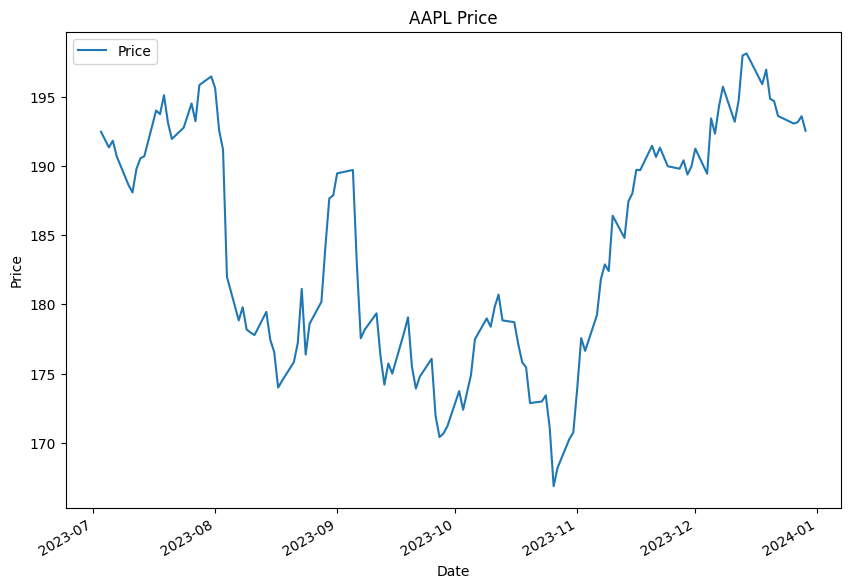

In [88]:
# plot the data
close.plot(figsize=(10, 7), title=f"{stock} Price")
plt.ylabel("Price")
plt.show()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

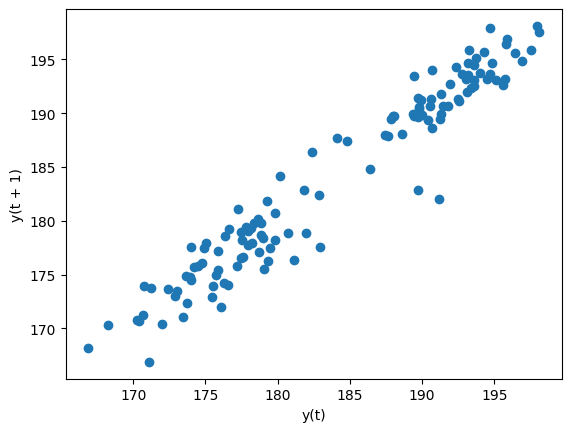

In [89]:
from pandas.plotting import lag_plot
plt.figure()
lag_plot(close['Price'], lag=1)

# Normality Tests

## Visual Normality Checks

### Histogram

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  4.,  0.,  2.,  2.,  3.,  4.,  3.,
         3.,  4.,  4.,  4.,  5.,  5.,  6.,  3.,  1.,  2.,  1.,  2.,  2.,
         0.,  1.,  1.,  0.,  0.,  1.,  1.,  4.,  1.,  0., 10.,  2.,  5.,
         4.,  3.,  4.,  9.,  2.,  4.,  2.,  3.,  1.,  1.,  3.]),
 array([166.88999939, 167.51439941, 168.13879944, 168.76319946,
        169.38759949, 170.01199951, 170.63639954, 171.26079956,
        171.88519958, 172.50959961, 173.13399963, 173.75839966,
        174.38279968, 175.00719971, 175.63159973, 176.25599976,
        176.88039978, 177.5047998 , 178.12919983, 178.75359985,
        179.37799988, 180.0023999 , 180.62679993, 181.25119995,
        181.87559998, 182.5       , 183.12440002, 183.74880005,
        184.37320007, 184.9976001 , 185.62200012, 186.24640015,
        186.87080017, 187.4952002 , 188.11960022, 188.74400024,
        189.36840027, 189.99280029, 190.61720032, 191.24160034,
        191.86600037, 192.49040039, 193.11480042, 193.73920044,
        194.

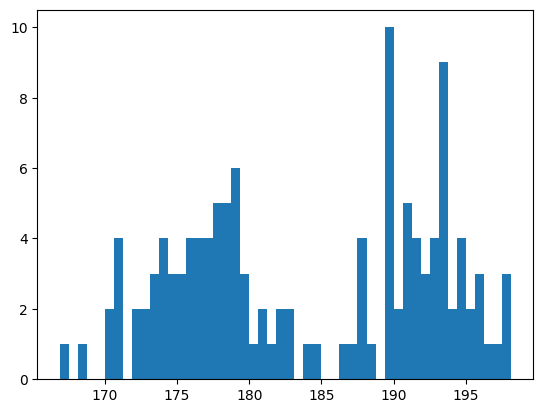

In [90]:
plt.hist(close['Price'], bins=50)

The distrubition does not display a classic bell curve shape. We can try to transform the data to a nepreian log scale to see if that helps.

In [91]:
# log of the price
close['lPrice'] = np.log(close['Price'])
close.head()

,Price,lPrice
Date,,
2023-07-03,192.460007,5.259888
2023-07-05,191.330002,5.254000
2023-07-06,191.809998,5.256505
2023-07-07,190.679993,5.250597
2023-07-10,188.610001,5.239681


(array([1., 0., 1., 0., 0., 1., 3., 2., 1., 1., 2., 3., 5., 3., 2., 5., 3.,
        4., 5., 5., 5., 4., 1., 2., 1., 2., 2., 0., 1., 1., 0., 0., 1., 1.,
        4., 1., 3., 7., 5., 4., 3., 4., 6., 6., 4., 2., 4., 1., 1., 3.]),
 array([5.11733491, 5.12076466, 5.12419441, 5.12762416, 5.13105391,
        5.13448366, 5.13791341, 5.14134316, 5.14477291, 5.14820266,
        5.15163241, 5.15506216, 5.15849192, 5.16192167, 5.16535142,
        5.16878117, 5.17221092, 5.17564067, 5.17907042, 5.18250017,
        5.18592992, 5.18935967, 5.19278942, 5.19621917, 5.19964892,
        5.20307867, 5.20650842, 5.20993817, 5.21336792, 5.21679767,
        5.22022742, 5.22365718, 5.22708693, 5.23051668, 5.23394643,
        5.23737618, 5.24080593, 5.24423568, 5.24766543, 5.25109518,
        5.25452493, 5.25795468, 5.26138443, 5.26481418, 5.26824393,
        5.27167368, 5.27510343, 5.27853318, 5.28196293, 5.28539268,
        5.28882244]),
 <BarContainer object of 50 artists>)

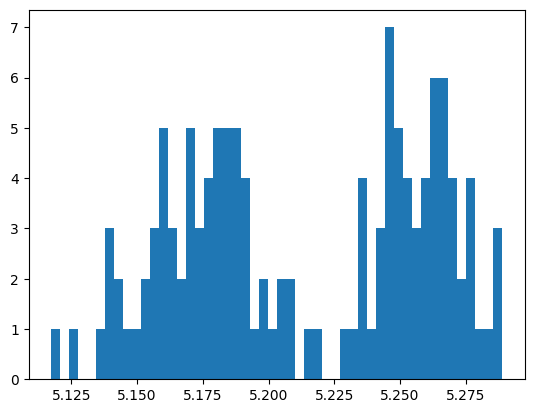

In [92]:
plt.hist(close['lPrice'], bins=50)

lPrice seems to be more normally distributed than Price. However, it is skewed to the right.

### QQ Plot

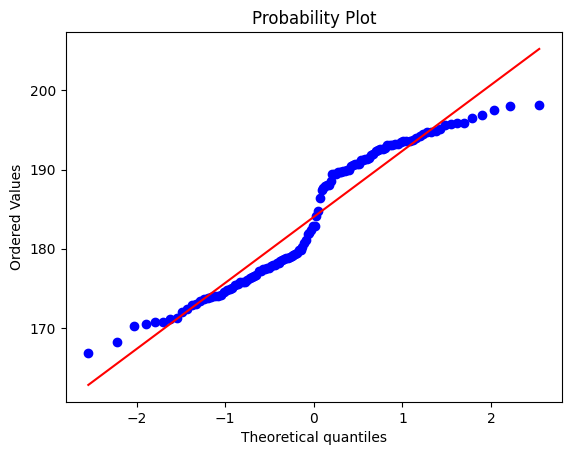

In [93]:
## qq plot of price
from scipy import stats

stats.probplot(close['Price'], dist="norm", plot=plt)
plt.show()

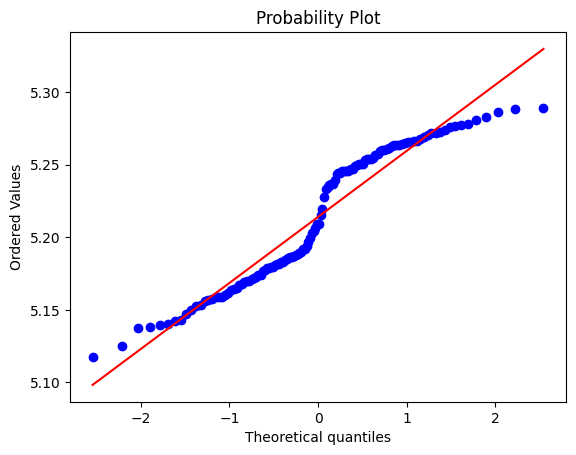

In [94]:
from scipy import stats

stats.probplot(close['lPrice'], dist="norm", plot=plt)
plt.show()

From the QQ plot, we can see that the data can be considered normal for the most part. However, there are some outliers that are skewing the data. 
We also conclude that the lPrice and Price are pretty much the same.

## Statistical Normality Tests

### Shapiro-Wilk Test

In [95]:
from scipy.stats import shapiro

stat, p = shapiro(close['Price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.924, p=0.000


H0: The data is normally distributed
p-value: 0.0 < 0.05 => reject H0
The Shapiro-Wilk test rejects the null hypothesis that the data is normally distributed.

In [96]:
from scipy.stats import shapiro

stat, p = shapiro(close['lPrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.925, p=0.000


We find that also lPrice is not normally distributed through the Shapiro-Wilk test.

### Skewness and Kurtosis

In [97]:
# skewness and kurtosis
print("Skewness: %f" % close['Price'].skew())
print("Kurtosis: %f" % close['Price'].kurt())

Skewness: -0.056393
Kurtosis: -1.416104


Skewness is positive, which means that the data is skewed to the right. Kurtosis is negative, which means that the data is platykurtic.

### Kolmogorov-Smirnov Test

In [98]:
# kolmogorov-smirnov test
from scipy.stats import kstest

stat, p = kstest(close['Price'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.000, p=0.000


In [99]:
from scipy.stats import kstest

stat, p = kstest(close['lPrice'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.000, p=0.000


Kolmorogov-Smirnov test also rejects the null hypothesis that the data is normally distributed.

### Transformations

We will now transform the data using Square Root Transformation to see if that helps.

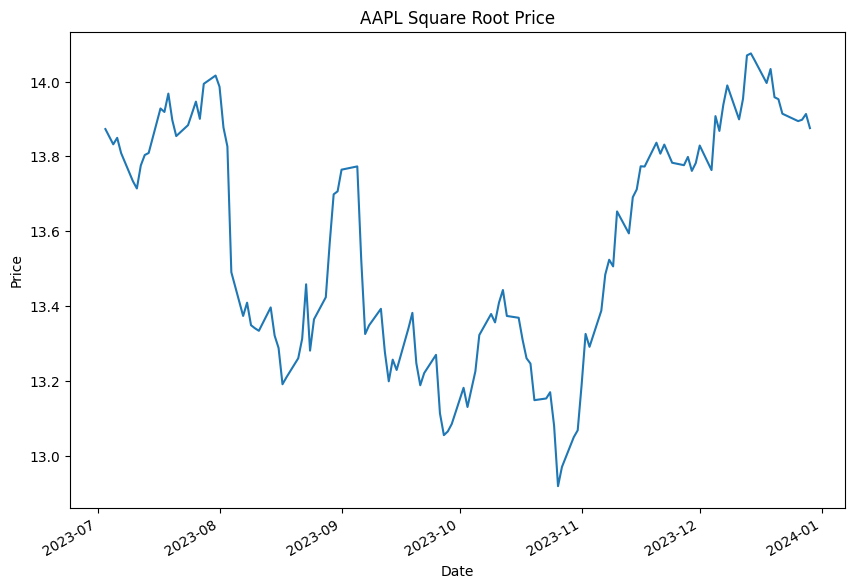

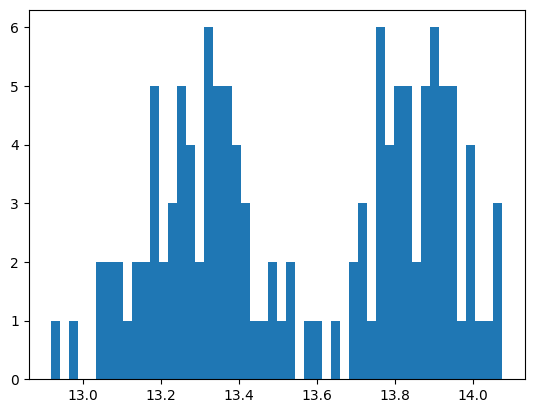

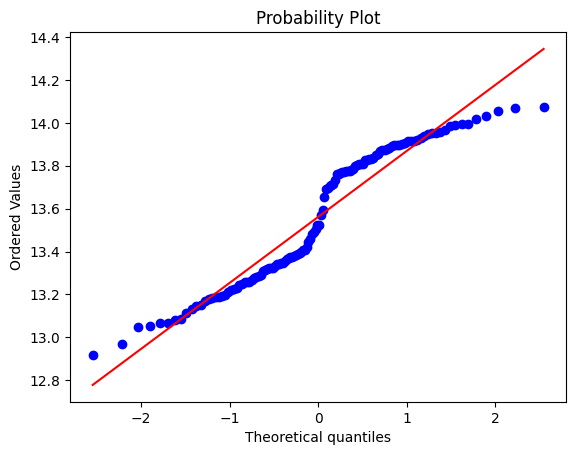

Statistics=0.925, p=0.000
Statistics=1.000, p=0.000


In [100]:
# transform the data using Square root and test for normality using visual and statistical methods
close['sqrtPrice'] = np.sqrt(close['Price'])

close['sqrtPrice'].plot(figsize=(10, 7), title=f"{stock} Square Root Price")
plt.ylabel("Price")
plt.show()

plt.hist(close['sqrtPrice'], bins=50)
plt.show()

stats.probplot(close['sqrtPrice'], dist="norm", plot=plt)
plt.show()

from scipy.stats import shapiro

stat, p = shapiro(close['sqrtPrice'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

from scipy.stats import kstest
stat, p = kstest(close['sqrtPrice'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))



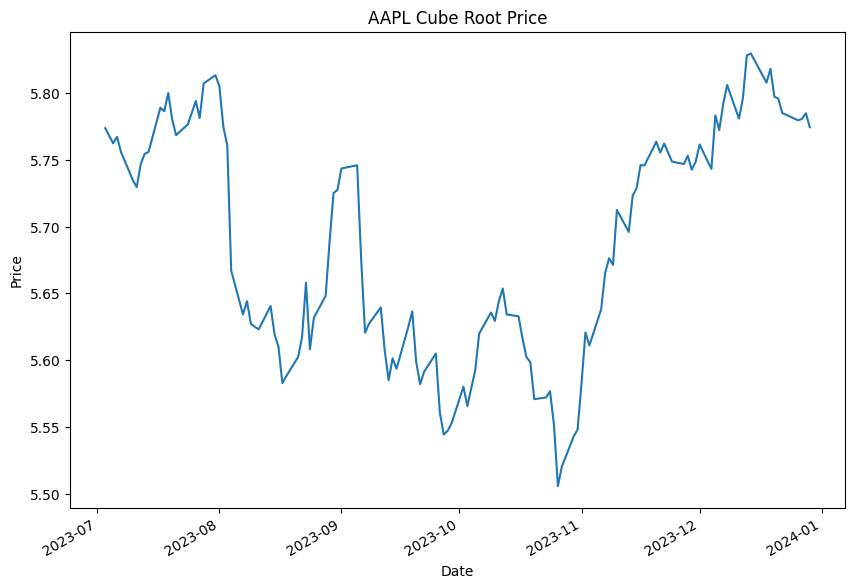

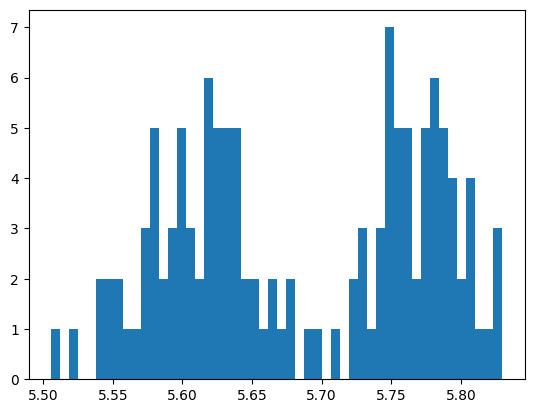

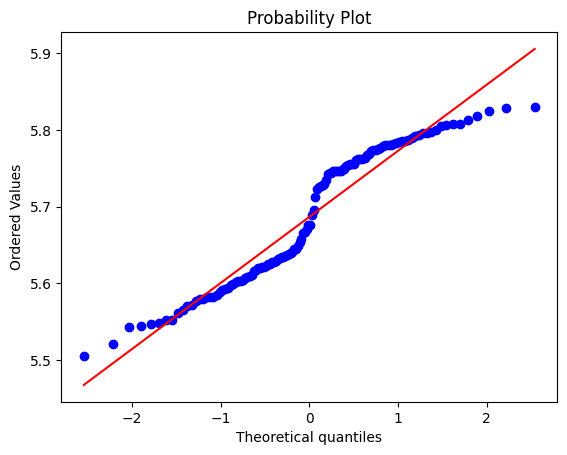

Statistics=0.925, p=0.000
Statistics=1.000, p=0.000


In [101]:
close['cbrtPrice'] = np.cbrt(close['Price'])

close['cbrtPrice'].plot(figsize=(10, 7), title=f"{stock} Cube Root Price")
plt.ylabel("Price")
plt.show()

plt.hist(close['cbrtPrice'], bins=50)
plt.show()

stats.probplot(close['cbrtPrice'], dist="norm", plot=plt)
plt.show()

stat, p = shapiro(close['cbrtPrice'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

stat, p = kstest(close['cbrtPrice'], 'norm')
print('Statistics=%.3f, p=%.3f' % (stat, p))

<font color='red'>All transformations failed to make the data normally distributed. We won't be using the transformed data.</font>

# Stationarity Tests

KPSS Test
H0: The data is stationary
p-value: 0.0 < 0.05 => reject H0

In [138]:
# KPSS test
from statsmodels.tsa.stattools import kpss

stat, p, lags, crit = kpss(close['Price'], 'c')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.403, p=0.076


Data is not stationary. We will need to transform the data to make it stationary.

Differencing the data once to make it stationary.

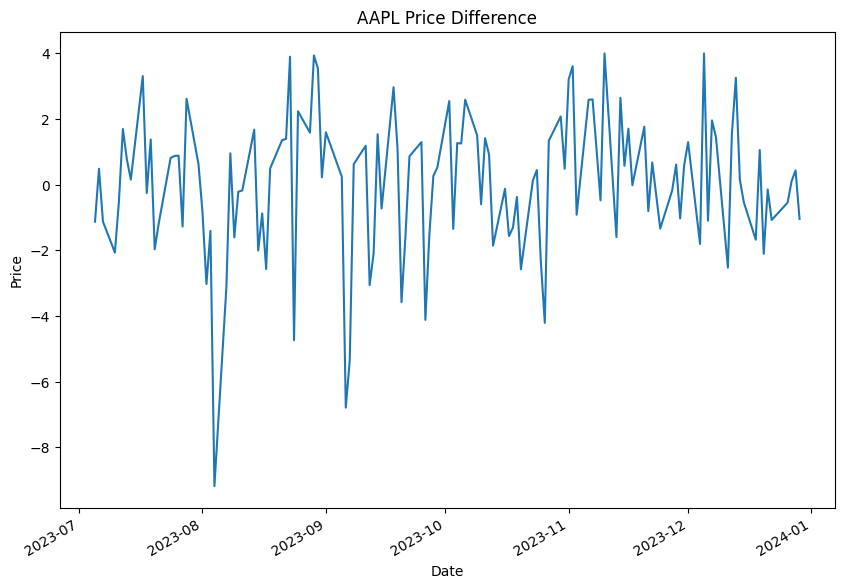

In [103]:
# difference the data
close['diff'] = close['Price'].diff().dropna()
close['diff'].plot(figsize=(10, 7), title=f"{stock} Price Difference")
plt.ylabel("Price")
plt.show()

<Axes: >

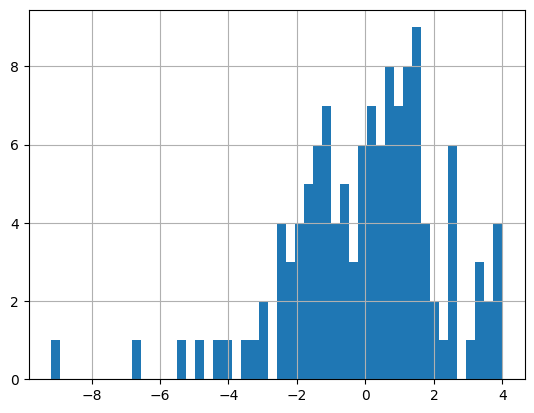

In [104]:
close['diff'].hist(bins=50)

In [105]:
close.head()

,Price,lPrice,sqrtPrice,cbrtPrice,diff
Date,,,,,
2023-07-03,192.460007,5.259888,13.872996,5.773602,NaN
2023-07-05,191.330002,5.254000,13.832209,5.762280,-1.130005
2023-07-06,191.809998,5.256505,13.849549,5.767095,0.479996
2023-07-07,190.679993,5.250597,13.808693,5.755747,-1.130005
2023-07-10,188.610001,5.239681,13.733536,5.734844,-2.069992


In [106]:
close = close.dropna()
stat, p, lags, crit = kpss(close['diff'], 'c')
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.204, p=0.100


C:\Users\MSI\AppData\Local\Temp\ipykernel_23500\284005713.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p, lags, crit = kpss(close['diff'], 'c')


Data is now stationary and normally distributed.

In [107]:
# ADF test
from statsmodels.tsa.stattools import adfuller

result = adfuller(close["Price"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -1.6245826850971203
n_lags: 0.4703276009596374
p-value: 0.4703276009596374
Critial Values:
   1%, -3.4846672514209773
Critial Values:
   5%, -2.8853397507076006
Critial Values:
   10%, -2.5794629869786503


ADF H0: null hypothesis assumes the presence of unit root, meaning that the data is not stationary

The ADF test is non conclusive. The ADF statistic is greater than the critical values, however the p-value is greater than 0.05. Therefore, we cannot reject the null hypothesis that the data is non-stationary.

In [108]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(close["diff"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -9.644121798752655
n_lags: 1.4935843666851241e-16
p-value: 1.4935843666851241e-16
Critial Values:
   1%, -3.484219653271961
Critial Values:
   5%, -2.885145235641637
Critial Values:
   10%, -2.579359138917794


The ADF test for the differenced data is conclusive. The ADF statistic is less than the critical values, and the p-value is less than 0.05. Therefore, we can reject the null hypothesis that the data is non-stationary.

# Model Selection

## ACF and PACF

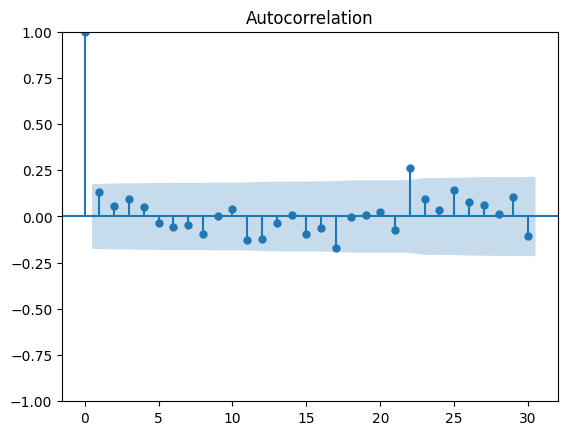

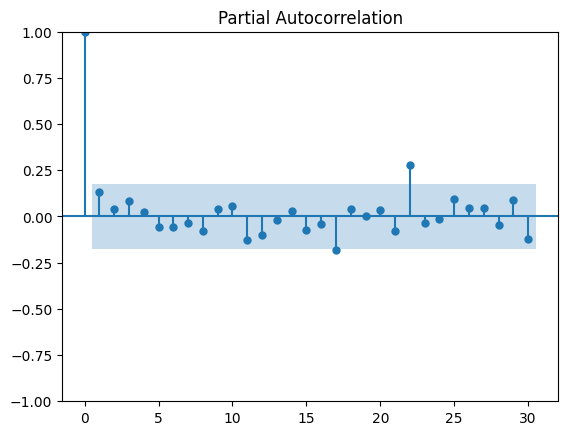

In [140]:
# ACF and PACF plots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(close['diff'], lags=30)
plt.show()

plot_pacf(close['diff'], lags=30)
plt.show()

The ACF and PACF plots suggest an ARIMA(1,1,0) model. The ACF plot shows a tailing off pattern, which suggests an AR model. The PACF plot displays a sharp cut off at lag 1, which suggests an AR(1) model.

In [110]:
close_=close.copy()

In [111]:
close_.head()

,Price,lPrice,sqrtPrice,cbrtPrice,diff
Date,,,,,
2023-07-05,191.330002,5.254000,13.832209,5.762280,-1.130005
2023-07-06,191.809998,5.256505,13.849549,5.767095,0.479996
2023-07-07,190.679993,5.250597,13.808693,5.755747,-1.130005
2023-07-10,188.610001,5.239681,13.733536,5.734844,-2.069992
2023-07-11,188.080002,5.236867,13.714226,5.729467,-0.529999


In [112]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(close_['Price'], order=(1, 1, 0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  125
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -270.887
Date:                Tue, 02 Jan 2024   AIC                            545.774
Time:                        10:57:44   BIC                            551.415
Sample:                             0   HQIC                           548.065
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1352      0.083      1.629      0.103      -0.028       0.298
sigma2         4.6233      0.421     10.989      0.000       3.799       5.448
Ljung-Box (L1) (Q):                   0.00   Jarque-

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [113]:
p=22
d=1
q=22

In [114]:
# ARIMA model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(close_['Price'], order=(p, d, q))
model_fit = model.fit()
print(model_fit.summary())

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
 

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  125
Model:               ARIMA(22, 1, 22)   Log Likelihood                -242.640
Date:                Tue, 02 Jan 2024   AIC                            575.280
Time:                        10:57:57   BIC                            702.193
Sample:                             0   HQIC                           626.835
                                - 125                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2302      0.694      0.331      0.740      -1.131       1.591
ar.L2          0.1186      0.565      0.210      0.834      -0.988       1.225
ar.L3          0.0541      0.428      0.126      0.8

In [115]:
# auto arima
from pmdarima.arima import auto_arima

auto_model = auto_arima(close_['Price'], trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, scoring='mse')
auto_model_fit=auto_model.fit(close_['Price'])
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=553.159, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=548.072, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=547.772, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=547.933, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=546.075, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=549.257, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.580 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  125
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -272.037
Date:                Tue, 02 Jan 2024   AIC                            546.075
Time:                        10:57:57   BIC                            548.895
Sample:                             0   HQIC                           547.220
                

Auto ARIMA suggests an ARIMA(0,1,0) model, however information indicatators show that there is no significant difference between the ARIMA(0,1,0) and ARIMA(1,1,0) models. The ar coefficient is also significant in the ARIMA(22,1,22) model, therefore we will use the ARIMA(22,1,22) model.

## Model Evaluation

### Residuals

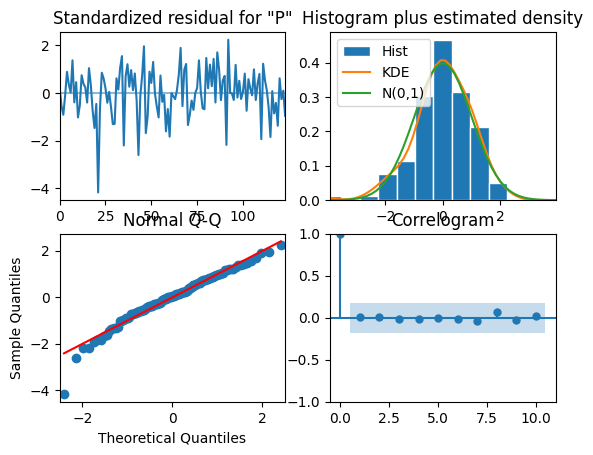

In [116]:
model_fit.plot_diagnostics()
plt.show()

In [117]:

test = model_fit.test_normality('jarquebera')
print('Test Statistic: %.2f, p-value: %.2f, Skew: %.2f, Kurtosis: %.2f' % (test[0][0], test[0][1], test[0][2], test[0][3]))

Test Statistic: 24.70, p-value: 0.00, Skew: -0.72, Kurtosis: 4.64


Jarque-Bera H0: The data is normally distributed

The p value of the Jarque-Bera test is less than 0.05, therefore we reject the null hypothesis that the residuals are normally distributed.

# Forecasting

In [118]:
close_ = close.copy()
close_.head()

,Price,lPrice,sqrtPrice,cbrtPrice,diff
Date,,,,,
2023-07-05,191.330002,5.254000,13.832209,5.762280,-1.130005
2023-07-06,191.809998,5.256505,13.849549,5.767095,0.479996
2023-07-07,190.679993,5.250597,13.808693,5.755747,-1.130005
2023-07-10,188.610001,5.239681,13.733536,5.734844,-2.069992
2023-07-11,188.080002,5.236867,13.714226,5.729467,-0.529999


In [119]:
# split the data into train and test
close_ = close_.reset_index()
close_ = close_.drop(columns=['Date', 'lPrice', 'sqrtPrice', 'cbrtPrice', 'diff'])
train = close_.iloc[:int(close_.shape[0]*0.8)]
test = close_.iloc[int(close_.shape[0]*0.8):]

In [120]:
close_.shape[0], train.shape[0], test.shape[0]

(125, 100, 25)

In [121]:
model = ARIMA(train['Price'], order=(p, d, q))
model_fit = model.fit()
model_fit.summary()

e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  100
Model:               ARIMA(22, 1, 22)   Log Likelihood                -196.440
Date:                Tue, 02 Jan 2024   AIC                            482.881
Time:                        10:58:12   BIC                            599.661
Sample:                             0   HQIC                           530.130
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0660      0.528      0.125      0.901      -0.969       1.101
ar.L2          0.1069      0.536      0.199      0.842      -0.944       1.158
ar.L3          0.0374      0.386      0.097      0.923      -0.719       0.794
ar.L4          0.0521      0.386      0.135      0.893      -0.704       0.808
ar.L5          0.1758      0.348      0.505      0.613      -0.506       0.857
ar.L6         -0.2344      0.383     -0.612      0.540      -0.985       0.516
ar.L7          0.0003      0.458      0.001      1.000      -0.897       0.898
ar.L8         -0.2367      0.442     -0.535      0.592      -1.103       0.630
ar.L9          0.1598      0.448      0.356      0.722      -0.719       1.039
ar.L10         0.2566      0.439      0.584      0.559      -0.604       1.117
ar.L11         0.0014      0.394      0.003      0.997      -0.771       0.773
ar.L12        -0.2158      0.446     -0.484      0.629      -1.090       0.659
ar.L13        -0.0879      0.476     -0.185      0.853      -1.021       0.845
ar.L14        -0.2744      0.377     -0.728      0.467      -1.013       0.464
ar.L15        -0.1879      0.508     -0.370      0.711      -1.183       0.807
ar.L16         0.1906      0.535      0.356      0.722      -0.858       1.239
ar.L17        -0.1229      0.321     -0.383      0.702      -0.752       0.506
ar.L18        -0.0812      0.355     -0.229      0.819      -0.777       0.615
ar.L19        -0.0294      0.409     -0.072      0.943      -0.831       0.772
ar.L20        -0.0496      0.439     -0.113      0.910      -0.910       0.811
ar.L21        -0.0831      0.508     -0.164      0.870      -1.079       0.913
ar.L22         0.4702      0.379      1.240      0.215      -0.273       1.214
ma.L1          0.2034      1.018      0.200      0.842      -1.792       2.199
ma.L2         -0.0962      0.869     -0.111      0.912      -1.800       1.607
ma.L3         -0.0689      1.554     -0.044      0.965      -3.115       2.977
ma.L4         -0.0807      1.059     -0.076      0.939      -2.155       1.994
ma.L5         -0.2928      1.352     -0.217      0.829      -2.943       2.357
ma.L6          0.1742      0.910      0.191      0.848      -1.609       1.957
ma.L7          0.0352      0.733      0.048      0.962      -1.401       1.472
ma.L8          0.1674      1.213      0.138      0.890      -2.210       2.544
ma.L9         -0.1234      0.989     -0.125      0.901      -2.061       1.814
ma.L10        -0.2158      1.213     -0.178      0.859      -2.593       2.161
ma.L11        -0.0955      1.362     -0.070      0.944      -2.765       2.574
ma.L12         0.2530      1.412      0.179      0.858      -2.514       3.020
ma.L13        -0.0020      1.535     -0.001      0.999      -3.011       3.007
ma.L14         0.6488      0.928      0.699      0.485      -1.170       2.468
ma.L15         0.3925      1.419      0.277      0.782      -2.389       3.174
ma.L16        -0.1988      1.370     -0.145      0.885      -2.884       2.487
ma

H0 :The null hypothesis is of no heteroskedasticity. p-value = 0.88 > 0.05 => we can not reject the null hypothesis. Heteroskedasticity is possible.

In [122]:
steps = len(test) -1 + 100
prediction_results= model_fit.get_forecast(steps, alpha=0.05)  # 95% conf
fc = prediction_results.predicted_mean
conf = prediction_results.conf_int()
se = prediction_results.se_mean


e:\study\ITF 2\projet\notebook\.venv\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [123]:
conf

,lower Price,upper Price
100,188.355301,194.541352
101,185.795423,195.716674
102,180.544589,193.244123
103,177.926302,192.899659
104,176.844521,193.744728
...,...,...
219,141.206722,238.327626
220,141.060580,238.499473
221,141.995950,239.782234
222,143.194028,241.323381


In [124]:
test.head()

,Price
100,189.970001
101,189.789993
102,190.399994
103,189.369995
104,189.949997


In [125]:
fc_series = pd.Series(fc, index=test.index)
lower_series = conf['lower Price']
upper_series = conf['upper Price']

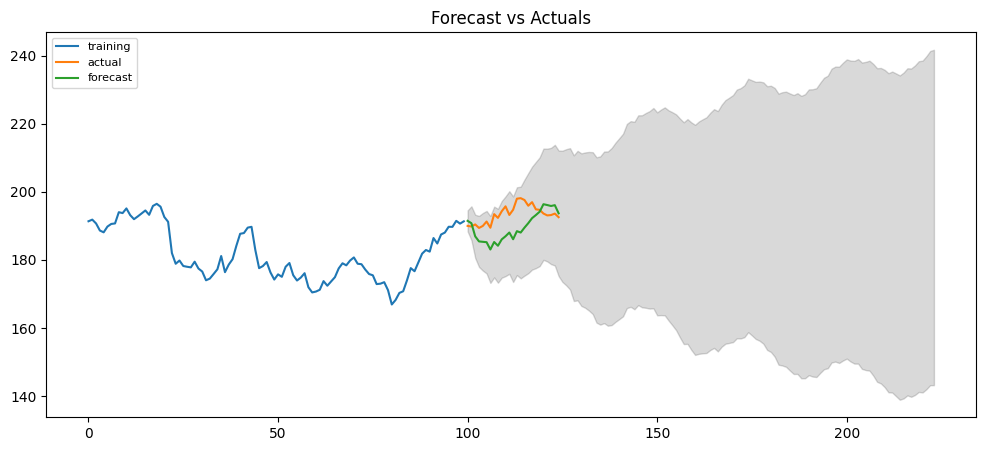

In [126]:
# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

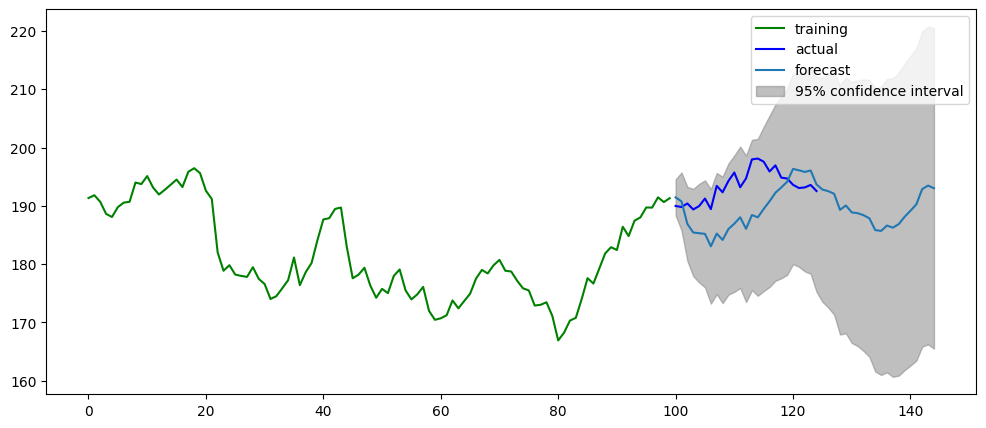

In [127]:
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots(figsize=(12, 5))

ax.plot(pd.DataFrame(train), '-g', label='training')
ax.plot(pd.DataFrame(test), '-b', label='actual')


plot_predict(model_fit, start=test.index[0], end=test.index[-1]+20, ax=ax);

In [128]:
model_fit.params

ar.L1     0.065952
ar.L2     0.106863
ar.L3     0.037428
ar.L4     0.052123
ar.L5     0.175755
ar.L6    -0.234430
ar.L7     0.000267
ar.L8    -0.236698
ar.L9     0.159842
ar.L10    0.256589
ar.L11    0.001365
ar.L12   -0.215754
ar.L13   -0.087911
ar.L14   -0.274431
ar.L15   -0.187883
ar.L16    0.190584
ar.L17   -0.122926
ar.L18   -0.081204
ar.L19   -0.029383
ar.L20   -0.049569
ar.L21   -0.083141
ar.L22    0.470230
ma.L1     0.203394
ma.L2    -0.096194
ma.L3    -0.068916
ma.L4    -0.080676
ma.L5    -0.292830
ma.L6     0.174193
ma.L7     0.035208
ma.L8     0.167354
ma.L9    -0.123430
ma.L10   -0.215835
ma.L11   -0.095522
ma.L12    0.253043
ma.L13   -0.002004
ma.L14    0.648784
ma.L15    0.392457
ma.L16   -0.198760
ma.L17   -0.171510
ma.L18    0.272696
ma.L19   -0.190452
ma.L20    0.072433
ma.L21   -0.155709
ma.L22    0.127511
sigma2    2.332254
dtype: float64

### Evaluation

In [129]:
# evaluate the model
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Price'], fc_series)
print('MSE: '+str(mse))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Price'], fc_series)
print('MAE: '+str(mae))

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test['Price'], fc_series)
print('MAPE: '+str(mape*100))


MSE: 34.10277525378327
MAE: 5.0435083919214545
MAPE: 2.598214003197473


In [130]:
from pmdarima.arima import auto_arima

auto_model = auto_arima(close_['Price'], trace=True, error_action='ignore', suppress_warnings=True, stepwise=True, scoring='mse', seasonal=True)
auto_model_fit=auto_model.fit(train['Price'])
print(auto_model.summary())

Performing stepwise search to minimize aic


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=553.159, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=548.072, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=547.772, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=547.933, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=546.075, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=549.257, Time=0.10 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.571 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -222.751
Date:                Tue, 02 Jan 2024   AIC                            447.502
Time:                        10:58:14   BIC                            450.097
Sample:                             0   HQIC                           448.552
                                - 100                      

In [131]:
# plot auto arima forecast
nb_periods = len(test)+100
fc, confint = auto_model.predict(n_periods=nb_periods, return_conf_int=True)


In [132]:

# make series for plotting purpose
fc_series = fc
lower_series = pd.Series(confint[:, 0], index=fc.index)
upper_series = pd.Series(confint[:, 1], index=fc.index)

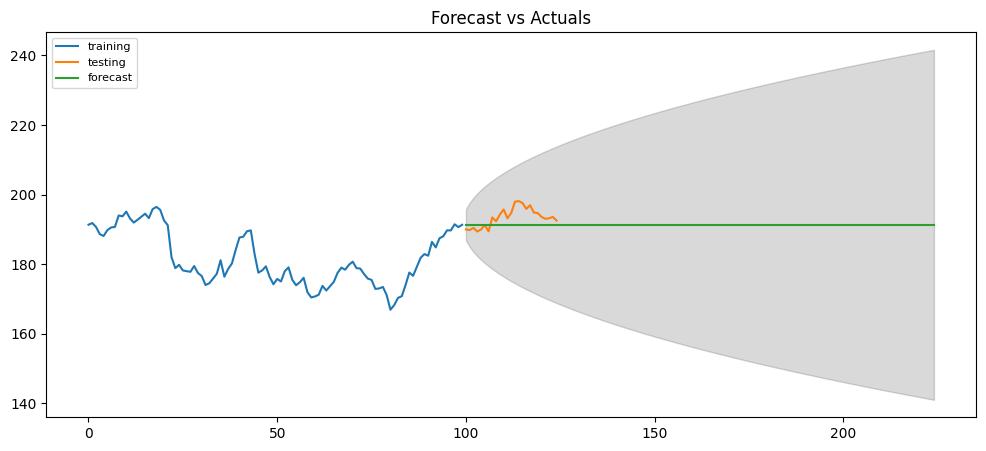

In [133]:

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train['Price'], label='training')
plt.plot(test['Price'], label='testing')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()


In [134]:

fc_series = pd.Series(fc, index=test.index)
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(test['Price'], fc_series)
print('MSE: '+str(mse))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test['Price'], fc_series)
print('MAE: '+str(mae))

from sklearn.metrics import mean_absolute_percentage_error

mape = mean_absolute_percentage_error(test['Price'], fc_series)
print('MAPE: '+str(mape*100))



MSE: 11.48428985745646
MAE: 2.8376031494140626
MAPE: 1.4557477594858939


In [135]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Price   No. Observations:                  100
Model:               ARIMA(22, 1, 22)   Log Likelihood                -196.440
Date:                Tue, 02 Jan 2024   AIC                            482.881
Time:                        10:58:14   BIC                            599.661
Sample:                             0   HQIC                           530.130
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0660      0.528      0.125      0.901      -0.969       1.101
ar.L2          0.1069      0.536      0.199      0.842      -0.944       1.158
ar.L3          0.0374      0.386      0.097      0.923      -0.719       0.794
ar.L4          0.0521      0.386      0.135      0.893      -0.704       0.808
ar.L5          0.1758      0.348      0.505      0.613      -0.506       0.857
ar.L6         -0.2344      0.383     -0.612      0.540      -0.985       0.516
ar.L7          0.0003      0.458      0.001      1.000      -0.897       0.898
ar.L8         -0.2367      0.442     -0.535      0.592      -1.103       0.630
ar.L9          0.1598      0.448      0.356      0.722      -0.719       1.039
ar.L10         0.2566      0.439      0.584      0.559      -0.604       1.117
ar.L11         0.0014      0.394      0.003      0.997      -0.771       0.773
ar.L12        -0.2158      0.446     -0.484      0.629      -1.090       0.659
ar.L13        -0.0879      0.476     -0.185      0.853      -1.021       0.845
ar.L14        -0.2744      0.377     -0.728      0.467      -1.013       0.464
ar.L15        -0.1879      0.508     -0.370      0.711      -1.183       0.807
ar.L16         0.1906      0.535      0.356      0.722      -0.858       1.239
ar.L17        -0.1229      0.321     -0.383      0.702      -0.752       0.506
ar.L18        -0.0812      0.355     -0.229      0.819      -0.777       0.615
ar.L19        -0.0294      0.409     -0.072      0.943      -0.831       0.772
ar.L20        -0.0496      0.439     -0.113      0.910      -0.910       0.811
ar.L21        -0.0831      0.508     -0.164      0.870      -1.079       0.913
ar.L22         0.4702      0.379      1.240      0.215      -0.273       1.214
ma.L1          0.2034      1.018      0.200      0.842      -1.792       2.199
ma.L2         -0.0962      0.869     -0.111      0.912      -1.800       1.607
ma.L3         -0.0689      1.554     -0.044      0.965      -3.115       2.977
ma.L4         -0.0807      1.059     -0.076      0.939      -2.155       1.994
ma.L5         -0.2928      1.352     -0.217      0.829      -2.943       2.357
ma.L6          0.1742      0.910      0.191      0.848      -1.609       1.957
ma.L7          0.0352      0.733      0.048      0.962      -1.401       1.472
ma.L8          0.1674      1.213      0.138      0.890      -2.210       2.544
ma.L9         -0.1234      0.989     -0.125      0.901      -2.061       1.814
ma.L10        -0.2158      1.213     -0.178      0.859      -2.593       2.161
ma.L11        -0.0955      1.362     -0.070      0.944      -2.765       2.574
ma.L12         0.2530      1.412      0.179      0.858      -2.514       3.020
ma.L13        -0.0020      1.535     -0.001      0.999      -3.011       3.007
ma.L14         0.6488      0.928      0.699      0.485      -1.170       2.468
ma.L15         0.3925      1.419      0.277      0.782      -2.389       3.174
ma.L16        -0.1988      1.370     -0.145      0.885      -2.884       2.487
ma

In [136]:
auto_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -222.751
Date:                Tue, 02 Jan 2024   AIC                            447.502
Time:                        10:58:15   BIC                            450.097
Sample:                             0   HQIC                           448.552
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         5.2706      0.534      9.875      0.000       4.224       6.317
===================================================================================
Ljung-Box (L1) (Q):                   3.64   Jarque-Bera (JB):                31.80
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.74   Skew:                            -0.99
Prob(H) (two-sided):                  0.38   Kurtosis:                         4.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Auto arima suggests an ARIMA(0,1,0) model. This result indicates a random walk model. The AIC and BIC values are also very high, which indicates that the model is not a good fit. The residuals are also not normally distributed. Therefore, we can conclude that forecasting using ARIMA is not a good idea. The stock price does not display a trend, and is very volatile.